In [159]:
from numpy import exp,asarray
from numpy.random import randn,uniform,rand,seed
import matplotlib.pyplot as plt

In [160]:
def ob(x):
    return x**2

In [161]:
def sim(ob,bounds=[[-5,5]],n_iter=1000,temp=10,step_size=0.1):
    scores=list()
    best = uniform(bounds[0][0],bounds[0][1])
    best_eval = ob(best)
    curr, curr_eval = best,best_eval
    
    for i in range(n_iter):
        cand = curr + randn(len(bounds)) * step_size
        cand_eval = ob(cand)
        
        if cand_eval<best_eval:
            best,best_eval = cand, cand_eval
            print(f'{i}> f({best}) : {best_eval}')
            scores.append(best_eval)
        
        t = temp/float(i+1)
        diff = cand_eval - curr_eval
        metropolis = exp(-diff/t)
        if diff<0 or rand()<metropolis:
            curr,curr_eval = cand,cand_eval
    return (best,best_eval,scores)

34> f([-0.78753544]) : [0.62021207]
35> f([-0.76914239]) : [0.59158001]
37> f([-0.68574854]) : [0.47025106]
39> f([-0.64797564]) : [0.41987243]
40> f([-0.58914623]) : [0.34709328]
41> f([-0.55446029]) : [0.30742622]
42> f([-0.41775702]) : [0.17452093]
43> f([-0.35038542]) : [0.12276994]
50> f([-0.15799045]) : [0.02496098]
66> f([-0.11089772]) : [0.0122983]
67> f([-0.09238208]) : [0.00853445]
72> f([-0.09145261]) : [0.00836358]
75> f([-0.05129162]) : [0.00263083]
93> f([-0.02854417]) : [0.00081477]
144> f([0.00864136]) : [7.46731022e-05]
149> f([0.00753953]) : [5.68444834e-05]
167> f([-0.00640394]) : [4.10104108e-05]
225> f([-0.00044965]) : [2.02184727e-07]
503> f([-0.00036261]) : [1.31483625e-07]
512> f([0.00013605]) : [1.85086423e-08]
Done!
f([0.00013605]): [1.85086423e-08]


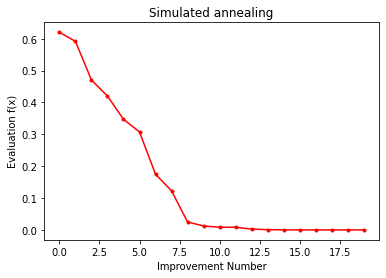

In [162]:
seed(1)
best,best_val, s = sim(ob)
print('Done!')
print(f'f({best}): {best_val}')
plt.plot(s,'.-',color='red')
plt.title('Simulated annealing')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()